**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

**Read Data**

In [2]:
url = "C:\\Users\MR9\Downloads\sales\sales_data.csv"
df = pd.read_csv(url)
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [3]:
df.shape

(4572, 5)

In [4]:
df.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

**Check for Null Values**

In [5]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

**Statistical Summary**

In [7]:
df.describe()

,TV,Radio,Social Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


<h2>Exploratory Data Analysis</h2>

**Counting the types of Influencers**

In [8]:
df.value_counts(['Influencer']).to_frame('Count')

,Count
Influencer,
Mega,1152
Micro,1148
Nano,1134
Macro,1112


**Calculating average sales for each type of influencer**

In [9]:
df_group1 = df[['Influencer', 'Sales']]
group1 = df_group1.groupby(['Influencer'], as_index = False).mean()
group1

,Influencer,Sales
0,Macro,196.066150
1,Mega,190.412908
2,Micro,191.578370
3,Nano,191.708827


**Correlation between Sales and other variables**

In [11]:
df.corr()['Sales']

TV              0.999497
Radio           0.868638
Social Media    0.527446
Sales           1.000000
Name: Sales, dtype: float64

**Visual representation of the relationship among variables**

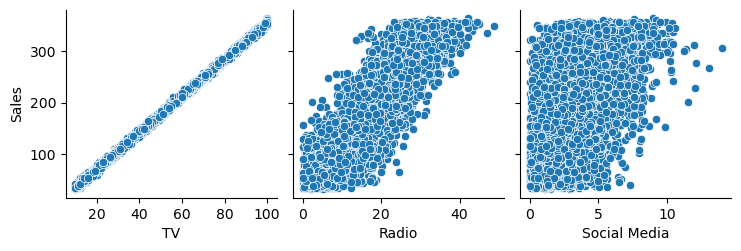

In [12]:
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Social Media'], y_vars =['Sales'])

As it can be seen in the graphs above, the relationship between Tv budget and Sales is linear, and it does not have any outliers. So, to measure the type and strength of the relationship, we will calculate Pearson Coefficient and p value. 

In [13]:
!pip install scikit-stats
from scipy import stats

**Pearson Coefficient & P-value**

In [14]:
pearson_coef, p_value = stats.pearsonr(df['TV'], df['Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


The Pearson Correlation Coefficient is 0.999497365938512  with a P-value of P = 0.0


Since, the P value is < 0.001, the correlation between TV budget and Sales is highly significant. Also, the Pearson Correlation Coefficient is closer to 1 which refers that the linear realtionship between them is extremely strong.


<h2>Model Development</h2>

**Linear Regression Model**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

**Prepare data for training & testing**

In [16]:
X = df.iloc[:, 0:3].values
Y = df.iloc[:, -1:].values


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 2)
X_train, Y_train

(array([[36.        , 14.16404637,  0.4972457 ],
        [11.        ,  0.21610117,  0.7532427 ],
        [52.        , 23.99344773,  0.5192123 ],
        ...,
        [19.        ,  2.38686432,  0.60145585],
        [97.        , 30.53983841,  8.84615424],
        [83.        , 28.35233604,  3.11193415]]),
 array([[134.9986474 ],
        [ 41.39651524],
        [190.1853454 ],
        ...,
        [ 63.1760749 ],
        [348.4529616 ],
        [302.2268785 ]]))

In [18]:
len(X_train), len(X_test)

(3409, 1137)

**Build Model**

In [19]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
lm.intercept_
lm.coef_

array([[ 3.56398083e+00, -7.57352641e-03,  2.51105214e-03]])

In [ ]:
yhat = lm.predict(X_test)
yhat

array([[241.95549402],
       [210.02554455],
       [135.21159393],
       ...,
       [242.03763178],
       [245.59098121],
       [ 78.15885088]])

<h2>Model Evaluation</h2>

In [23]:
from sklearn.metrics import r2_score,mean_squared_error

**Mean Squared Error(MSE)**

In [37]:
 mean_squared_error(Y_test, yhat)

8.823800287915503

**R-Squared Error**

In [40]:
r2_score(Y_test, yhat)

0.9989826571662125